# From Admission to Readmission: A Quantitative Study of Patient Experience and Hospital Burden

Author: Janice Teguh

# Overview

This project analyzes the key factors influencing hospital operations to form recommendations for improving care quality and cost efficiency. Descriptive analysis of patient data reveals that hospital-incurred costs, readmission risk, and patient satisfaction are influenced by variables such as age, gender, medical condition, and treatment outcomes. The hospital can use these insights to optimise resource allocation, reduce unnecessary readmissions, and tailor care strategies—particularly for high-risk groups like older and female patients—to enhance overall patient experience and operational sustainability.

# Business Problem

The hospital is looking to improve patient outcomes while managing operational costs, but currently lacks a clear understanding of how key factors—such as demographics, procedures, and outcomes—influence hospital-incurred costs, readmission rates, and patient satisfaction. This knowledge is essential for designing effective care strategies and reducing avoidable expenses. Using patient-level data, I analyse the relationships between variables like age, gender, medical condition, procedure type, and outcome with cost and satisfaction.

## Data Understanding

The data is from https://www.kaggle.com/datasets/blueblushed/hospital-dataset-for-practice/data

- Patient_ID: Unique identifier assigned to each patient.

- Age: Age of the patient at the time of admission.

- Gender: Patient’s gender (e.g., Male or Female).

- Condition: The medical condition diagnosed or treated.

- Procedure: The type of procedure or treatment administered.

- Outcome: Final health outcome at discharge (e.g., Recovered or Stable).

- Length_of_Stay: Number of days the patient stayed in the hospital.

- Cost: Total cost incurred by the hospital for treating the patient.

- Satisfaction: Patient-reported satisfaction score on a scale (1–5).

- Readmission: Indicates whether the patient was readmitted after discharge (Yes or No).

## Data Modelling and Evaluation

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
# the LabelEncoder class from scikit-learn
# which is used to convert categorical text labels (like "Male" or "Recovered") 
# into numeric values (e.g., 0, 1, etc.) so that they can be used in regression analysis.
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

%matplotlib inline

In [2]:
#check there is no null values
data = pd.read_csv('./hospital data analysis.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      984 non-null    int64 
 1   Age             984 non-null    int64 
 2   Gender          984 non-null    object
 3   Condition       984 non-null    object
 4   Procedure       984 non-null    object
 5   Cost            984 non-null    int64 
 6   Length_of_Stay  984 non-null    int64 
 7   Readmission     984 non-null    object
 8   Outcome         984 non-null    object
 9   Satisfaction    984 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 77.0+ KB


In [3]:
data.head(10)

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4
5,6,68,Male,Hypertension,Medication and Counseling,1000,2,No,Stable,4
6,7,55,Female,Appendicitis,Appendectomy,8000,4,No,Recovered,3
7,8,40,Male,Fractured Leg,Cast and Physical Therapy,3000,6,No,Recovered,4
8,9,70,Female,Heart Attack,Cardiac Catheterization,18000,8,Yes,Stable,2
9,10,25,Male,Allergic Reaction,Epinephrine Injection,100,1,No,Recovered,5


In [4]:
# Encode categorical variables
categorical_cols = ['Gender', 'Condition', 'Procedure', 'Readmission', 'Outcome']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [5]:
#analyse satisfaction-driving factors using regression analysis
# Define features and target
X = data[['Age', 'Gender', 'Condition', 'Procedure', 'Cost', 'Length_of_Stay', 'Readmission', 'Outcome']]
y = data['Satisfaction']

# Add constant for regression model
X_const = sm.add_constant(X)

# Fit an OLS regression model
model = sm.OLS(y, X_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Satisfaction   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     453.2
Date:                Mon, 23 Jun 2025   Prob (F-statistic):          3.06e-322
Time:                        14:54:05   Log-Likelihood:                -509.92
No. Observations:                 984   AIC:                             1038.
Df Residuals:                     975   BIC:                             1082.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.6897      0.072     78.890      0.000       5.548       5.831
Age               -0.0440      0.002    -21.678      0.000      -0.048      -0.040
Gender            -0.2405      0.034     -7.100      0.000      -0.307      -0.174
Condition         -0.0122      0.004     -3.184      0.001      -0.020      -0.005
Procedure          0.0773      0.003     23.848      0.000       0.071       0.084
Cost           -2.732e-05   2.77e-06     -9.855      0.000   -3.28e-05   -2.19e-05
Length_of_Stay  9.447e-05      0.001      0.141      0.888      -0.001       0.001
Readmission       -0.0311      0.038     -0.825      0.410      -0.105       0.043
Outcome            0.4069      0.055      7.337      0.000       0.298       0.516
==============================================================================
Omnibus:                       59.952   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.166
Skew:                           0.147   Prob(JB):                     3.43e-06
Kurtosis:                       2.274   Cond. No.                     7.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared: 0.788 → The model explains about 79% of the variability in satisfaction.

F-statistic: Highly significant (p < 0.001) → Overall model is meaningful.

Patient satisfaction is significantly influenced by:

- The type of procedure (some procedures lead to higher satisfaction)
- The medical outcome (strongest influence > one outcome group is linked with higher satisfaction)
- Patient's condition (Certain conditions are associated with slightly lower satisfaction, but very low influence)
- Cost (Higher costs incurred by hospital are slightly associated with lower satisfaction)
- The patient’s age (older patients tend to report lower satisfaction)
- The patient's gender (showing lower satisfaction in one gender group)

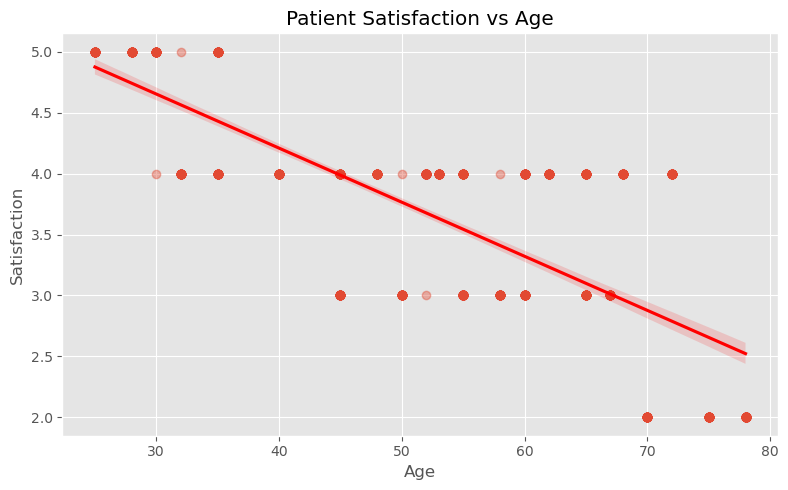

(-0.7504291026405123, 8.63593008236546e-179)

In [6]:
# analyse age vs satisfaction
# choose pearson correlation because it shows p-value
# and it's comparing 2 continuous numeric variable

# Calculate Pearson correlation between age and satisfaction
age_satisfaction_corr, age_satisfaction_p = pearsonr(data['Age'], data['Satisfaction'])

# Create scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='Age', y='Satisfaction', data=data, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.xlabel("Age")
plt.ylabel("Satisfaction")
plt.title("Patient Satisfaction vs Age")
plt.tight_layout()
plt.show()

age_satisfaction_corr, age_satisfaction_p

There is a strong negative correlation between age and satisfaction. As patient age increases, satisfaction tends to decrease significantly.

The regression plot also shows a clear downward trend.

In [22]:
data = pd.read_csv('./hospital data analysis.csv')

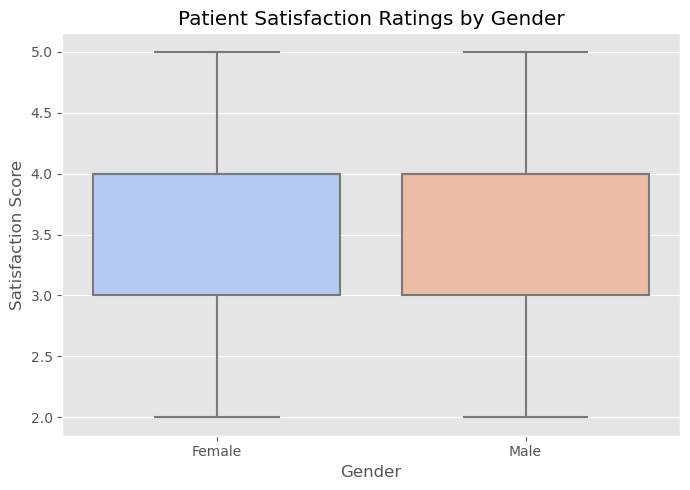

t_stat=3.1375080424537467, p_value=0.0017566022000497328, female_mean=3.681297709923664, male_mean=3.5043478260869567


In [8]:
# conducting independent t-test to assess satisfaction ratings 
# between female and male patients

# Get satisfaction scores grouped by gender
female_satisfaction = data[data['Gender'] == 'Female']['Satisfaction']
male_satisfaction = data[data['Gender'] == 'Male']['Satisfaction']

# Perform independent t-test
t_stat, p_value = ttest_ind(female_satisfaction, male_satisfaction, equal_var=False)

# Calculate means for context
female_mean = female_satisfaction.mean()
male_mean = male_satisfaction.mean()

# Boxplot to visualise satisfaction ratings by gender
plt.figure(figsize=(7, 5))
sns.boxplot(x='Gender', y='Satisfaction', data=data, palette="coolwarm")
plt.title("Patient Satisfaction Ratings by Gender")
plt.ylabel("Satisfaction Score")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

print(f"t_stat={t_stat}, p_value={p_value}, female_mean={female_mean}, male_mean={male_mean}")

Female patients report statistically significant higher satisfaction than male patients.

The difference, while modest, is statistically significant and consistent in the boxplot.

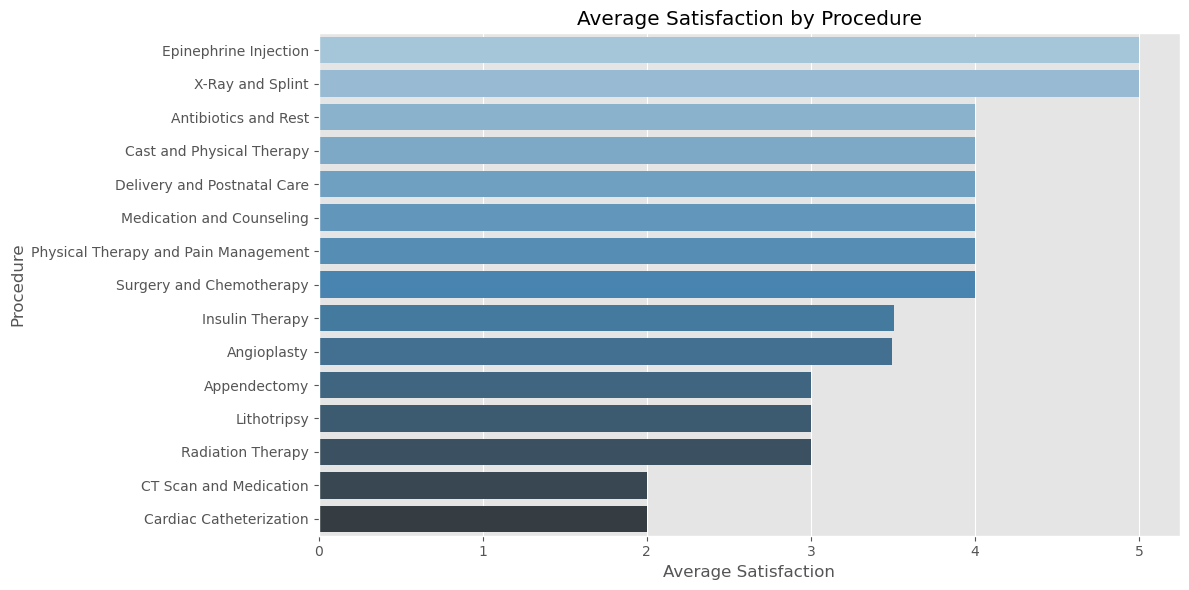

1563.4324249889464, 0.0000000000


In [9]:
#use one way anova to determine whether satisfaction ratings 
# significantly differ across different procedures

# Group satisfaction scores by procedure
procedure_groups = data.groupby('Procedure')['Satisfaction'].apply(list)

# Run one-way ANOVA test to compare satisfaction across procedures
anova_stat, anova_p = f_oneway(*procedure_groups)

# Calculate mean satisfaction per procedure for context
mean_satisfaction_by_procedure = data.groupby('Procedure')['Satisfaction'].mean().sort_values(ascending=False)

# Plot mean satisfaction by procedure
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_satisfaction_by_procedure.values,
            y=mean_satisfaction_by_procedure.index,
            palette="Blues_d")
plt.xlabel("Average Satisfaction")
plt.ylabel("Procedure")
plt.title("Average Satisfaction by Procedure")
plt.tight_layout()
plt.show()

print(f"{anova_stat}, {anova_p:.10f}")

There is a highly significant difference in satisfaction ratings across different procedures.

This means the type of procedure strongly influences patient satisfaction.

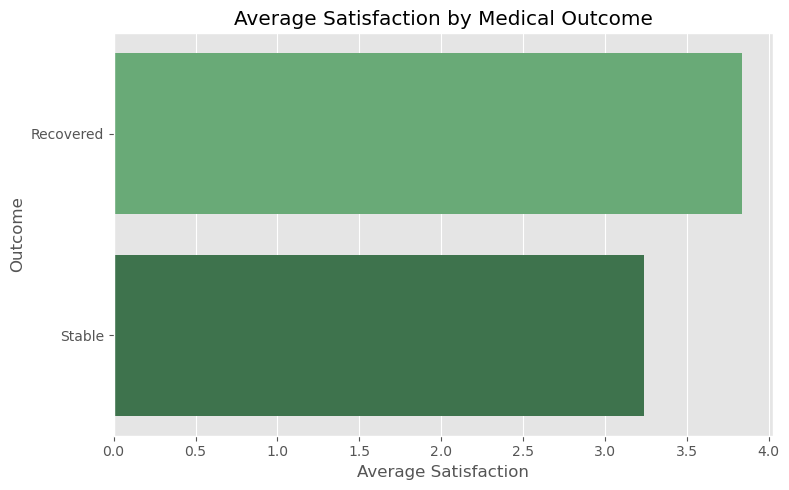

119.7792891642688 2.1997523372860492e-26


In [10]:
# use one way anova to test if satisfaction scores differ across different medical outcomes


# Group satisfaction scores by medical outcome
outcome_groups = data.groupby('Outcome')['Satisfaction'].apply(list)

# Run one-way ANOVA to compare satisfaction across outcomes
anova_stat, anova_p = f_oneway(*outcome_groups)

# Calculate mean satisfaction per outcome for context
mean_satisfaction_by_outcome = data.groupby('Outcome')['Satisfaction'].mean().sort_values(ascending=False)

# Plot mean satisfaction by outcome
plt.figure(figsize=(8, 5))
sns.barplot(x=mean_satisfaction_by_outcome.values,
            y=mean_satisfaction_by_outcome.index,
            palette="Greens_d")
plt.xlabel("Average Satisfaction")
plt.ylabel("Outcome")
plt.title("Average Satisfaction by Medical Outcome")
plt.tight_layout()
plt.show()

print(anova_stat, anova_p)

The type of medical outcome has a strong impact on patient satisfaction.

Patients who experienced better outcomes (e.g. Recovered) report statistically significant higher satisfaction.

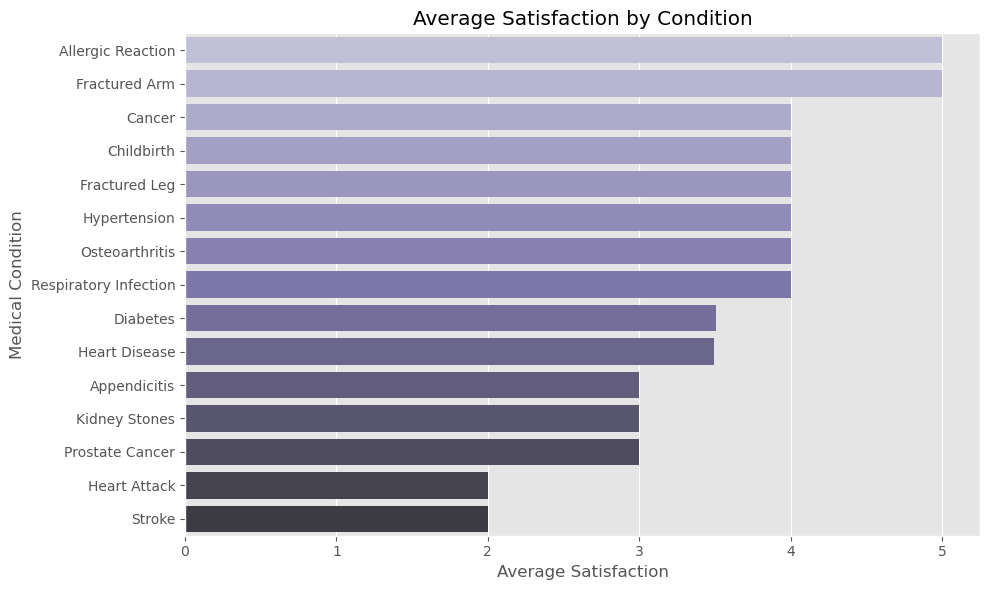

1563.432424988952, 0.0000000000


In [11]:
# perform one way anova to assess whether satisfaction differs significantly by medical condition

# Group satisfaction scores by medical condition
condition_groups = data.groupby('Condition')['Satisfaction'].apply(list)

# Run one-way ANOVA to compare satisfaction across conditions
anova_stat, anova_p = f_oneway(*condition_groups)

# Calculate mean satisfaction per condition for context
mean_satisfaction_by_condition = data.groupby('Condition')['Satisfaction'].mean().sort_values(ascending=False)

# Plot mean satisfaction by condition
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_satisfaction_by_condition.values,
            y=mean_satisfaction_by_condition.index,
            palette="Purples_d")
plt.xlabel("Average Satisfaction")
plt.ylabel("Medical Condition")
plt.title("Average Satisfaction by Condition")
plt.tight_layout()
plt.show()

print(f"{anova_stat}, {anova_p:.10f}")

There is a highly significant difference in satisfaction across different medical conditions.

This indicates that the nature of the patient’s condition strongly affects their satisfaction with care.

Conditions with lower satisfaction might involve more discomfort, uncertainty, or longer recovery.

Conditions with higher satisfaction may involve clearer treatment paths or better patient experiences.

In [12]:
# Analyze cost drivers using regression and summary statistics

categorical_cols = ['Gender', 'Condition', 'Procedure', 'Readmission', 'Outcome']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Target: Cost
# Features: Age, Gender, Condition, Procedure, Length_of_Stay, Readmission, Outcome
X_cost = data[['Age', 'Gender', 'Condition', 'Procedure', 'Length_of_Stay', 'Readmission', 'Outcome']]
y_cost = data['Cost']

# Add constant for regression
X_cost_const = sm.add_constant(X_cost)

# Fit OLS regression model
cost_model = sm.OLS(y_cost, X_cost_const).fit()
cost_summary = cost_model.summary()

cost_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     241.4
Date:                Mon, 23 Jun 2025   Prob (F-statistic):          5.87e-208
Time:                        14:54:06   Log-Likelihood:                -9715.1
No. Observations:                 984   AIC:                         1.945e+04
Df Residuals:                     976   BIC:                         1.949e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.166e+04    744.571    -15.663      0.000   -1.31e+04   -1.02e+04
Age              504.3419     16.973     29.714      0.000     471.034     537.650
Gender         -5504.5052    349.212    -15.763      0.000   -6189.798   -4819.213
Condition        -71.2356     44.080     -1.616      0.106    -157.738      15.267
Procedure        109.1740     37.284      2.928      0.003      36.008     182.339
Length_of_Stay    14.5023      7.718      1.879      0.061      -0.643      29.648
Readmission      676.2843    434.895      1.555      0.120    -177.154    1529.722
Outcome        -1.377e+04    464.626    -29.645      0.000   -1.47e+04   -1.29e+04
==============================================================================
Omnibus:                       22.147   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.049
Skew:                          -0.338   Prob(JB):                     1.63e-05
Kurtosis:                       2.716   Cond. No.                         356.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared: 0.634 → About 63% of the variability in cost is explained by the model.

F-statistic: Very significant (p < 0.001) → The model is valid overall.

Significant predictors of cost:
- Age (older patients tend to incur higher costs)
- Gender (the encoded gender variable has a strong negative impact/ one gender group incurs significantly lower costs)
- Procedure (Cost increases with certain procedures)
- Outcome (Certain outcome may be linked to lower costs)

In [23]:
data = pd.read_csv('./hospital data analysis.csv')

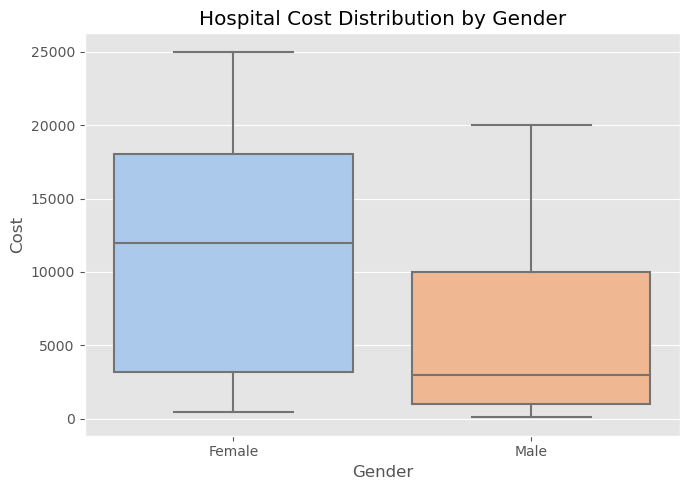

(9.549198951790144,
 1.0222453393056092e-20,
 10458.015267175573,
 5986.086956521739)

In [24]:
#perform independent t-test to compare the average hospital costs between female and male patients
# Separate cost data by gender
female_cost = data[data['Gender'] == 'Female']['Cost']
male_cost = data[data['Gender'] == 'Male']['Cost']

# Perform independent t-test
t_stat_gender_cost, p_value_gender_cost = ttest_ind(female_cost, male_cost, equal_var=False)

# Calculate mean cost for each gender (unit in AUD)
female_cost_mean = female_cost.mean()
male_cost_mean = male_cost.mean()

# Plot cost distribution by gender
plt.figure(figsize=(7, 5))
sns.boxplot(x='Gender', y='Cost', data=data, palette="pastel")
plt.title("Hospital Cost Distribution by Gender")
plt.tight_layout()
plt.show()

t_stat_gender_cost, p_value_gender_cost, female_cost_mean, male_cost_mean

There is a statistically significant and substantial difference in average hospital costs between genders.

Female patients incur significantly higher costs than male patients in this dataset.

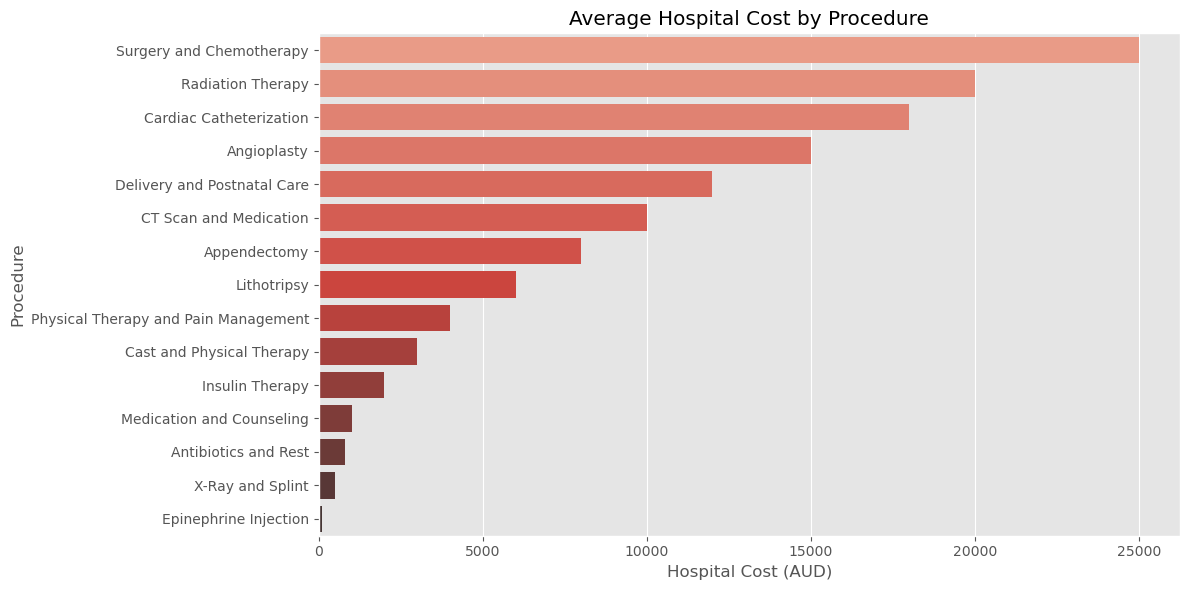

In [25]:
#analyse cost vs procedure
#calculate mean cost
mean_cost_by_procedure = data.groupby("Procedure")["Cost"].mean().sort_values(ascending=False)

# Create a bar plot showing hospital cost by procedure
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_cost_by_procedure.values,
            y=mean_cost_by_procedure.index,
            palette="Reds_d")
plt.xlabel("Hospital Cost (AUD)")
plt.ylabel("Procedure")
plt.title("Average Hospital Cost by Procedure")
plt.tight_layout()
plt.show()

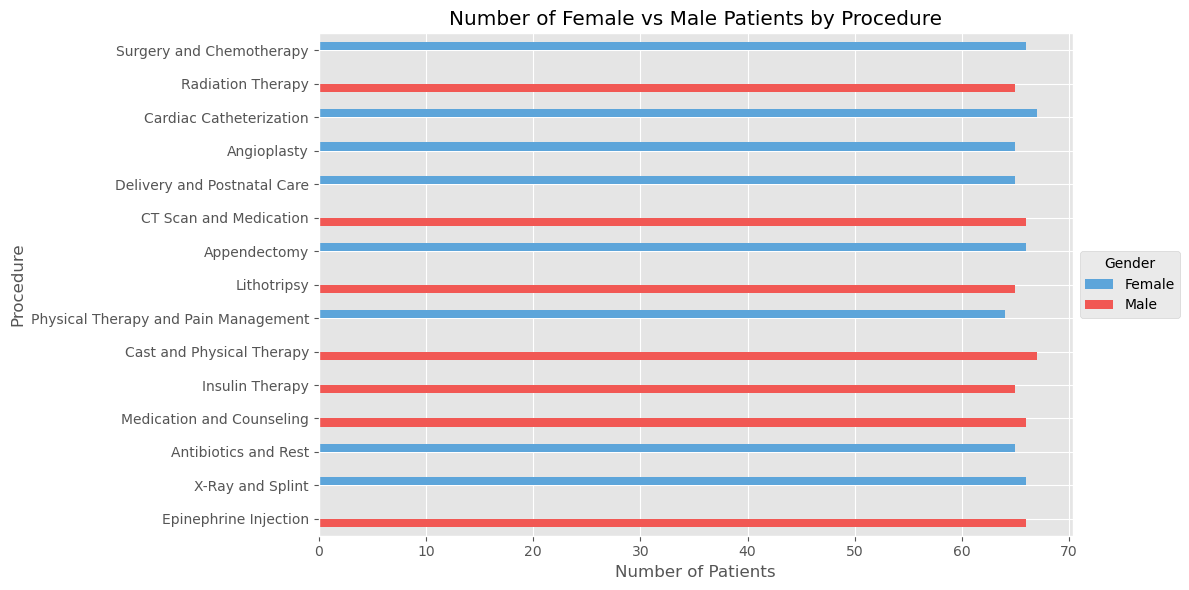

In [26]:
# find out percentage of male/ female patients for each procedure
# Count number of male and female patients per procedure
gender_counts = data.groupby(['Procedure', 'Gender']).size().unstack(fill_value=0)

# Reorder to match the y-axis order from the previous cost plot
gender_counts = gender_counts.loc[mean_cost_by_procedure.index]

# Plot side-by-side bar chart (horizontal) for gender counts per procedure
fig, ax = plt.subplots(figsize=(12, 6))  # wider plot

gender_counts.plot(kind='barh', stacked=False, color=["#5DA5DA", "#F15854"], ax=ax)
# Move legend outside the plot (to the right)
ax.legend(title="Gender", loc="center left", bbox_to_anchor=(1.0, 0.5))

ax.set_xlabel("Number of Patients")
ax.set_ylabel("Procedure")
ax.set_title("Number of Female vs Male Patients by Procedure")
ax.invert_yaxis()  # Keep order same as cost chart
plt.tight_layout()
plt.show()

Interpretation: 

Female patients are more likely to undergo high-cost procedures, which directly contributes to their higher average cost per patient.

This may be caused by:
- More health awareness for female patients, and willingness to undergo more expensive treatments
- Treatments only available for women are priced higher (e.g., delivery and postnatal care)

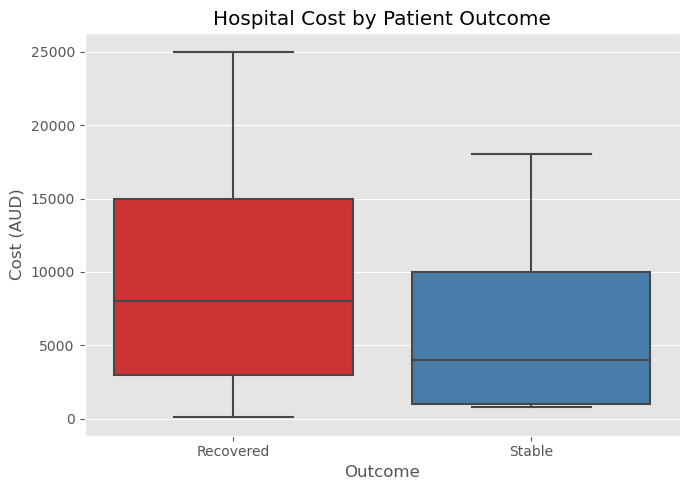

(8.383185351804215,
 1.8080610242749812e-16,
 9921.489001692047,
 6030.534351145038)

In [27]:
#use independent t-test to analyse how hospital costs differ based on patient outcomes

# Separate cost by outcome
cost_recovered = data[data['Outcome'] == 'Recovered']['Cost']
cost_stable = data[data['Outcome'] == 'Stable']['Cost']

# Perform t-test
t_stat_cost_outcome, p_val_cost_outcome = ttest_ind(cost_recovered, cost_stable, equal_var=False)

# Calculate group means
mean_cost_recovered = cost_recovered.mean()
mean_cost_stable = cost_stable.mean()

# Plot boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(x='Outcome', y='Cost', data=data, palette="Set1")
plt.title("Hospital Cost by Patient Outcome")
plt.ylabel("Cost (AUD)")
plt.tight_layout()
plt.show()

t_stat_cost_outcome, p_val_cost_outcome, mean_cost_recovered, mean_cost_stable

Patients who are fully recovered incur significantly higher costs than those who are discharged as "Stable".

The boxplot confirms that recovered patients tend to undergo more intensive or longer treatments.

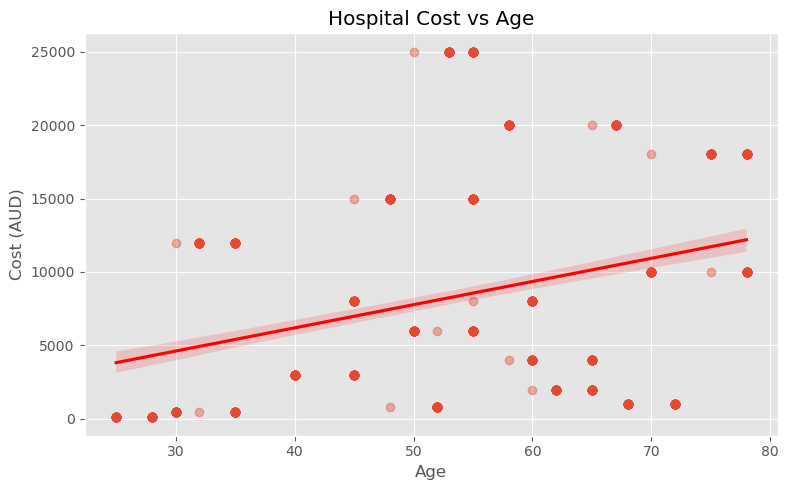

(0.3038157871404073, 1.852105872603747e-22)

In [28]:
# Calculate Pearson correlation between age and cost
age_cost_corr, age_cost_p = pearsonr(data['Age'], data['Cost'])

# Create scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='Age', y='Cost', data=data, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.xlabel("Age")
plt.ylabel("Cost (AUD)")
plt.title("Hospital Cost vs Age")
plt.tight_layout()
plt.show()

age_cost_corr, age_cost_p

There is a moderate positive correlation between age and cost.

As patient age increases, hospital costs tend to rise.

In [18]:
#The logit is the link function used in logistic regression
#which predicts the probability of a binary outcome — like:
#Will the patient be readmitted? → Yes (1) or No (0)
#analyse readmission-driving factors

from statsmodels.formula.api import logit

#Prepare the dataset: copy and encode categorical variables
logit_df = data.copy()
for col in ['Gender', 'Condition', 'Procedure', 'Outcome', 'Readmission']:
    logit_df[col] = LabelEncoder().fit_transform(logit_df[col])

#Define the logistic regression formula
logit_formula = 'Readmission ~ Age + Cost + Satisfaction + Length_of_Stay + Gender + Condition + Procedure + Outcome'

# Fit the logistic regression model using statsmodels
logit_model = logit(logit_formula, data=logit_df).fit()

# Display the summary
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.355348
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Readmission   No. Observations:                  984
Model:                          Logit   Df Residuals:                      975
Method:                           MLE   Df Model:                            8
Date:                Mon, 23 Jun 2025   Pseudo R-squ.:                  0.3890
Time:                        14:54:06   Log-Likelihood:                -349.66
converged:                       True   LL-Null:                       -572.25
Covariance Type:            nonrobust   LLR p-value:                 4.004e-91
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.7110      1.608     -0.442      0.658      -3.863       2.441
Age                0.0859      0.019      4.526      0.000       0.049       0.123
Cost            4.036e-06   1.98e-05      0.204      0.839   -3.48e-05    4.29e-05
Satisfaction      -0.9587      0.305     -3.147      0.002      -1.556      -0.362
Length_of_Stay     0.0004      0.005      0.077      0.939      -0.009       0.010
Gender            -3.9294      0.508     -7.730      0.000      -4.926      -2.933
Condition          0.0936      0.046      2.030      0.042       0.003       0.184
Procedure         -0.0356      0.033     -1.088      0.277      -0.100       0.029
Outcome           -2.5676      0.475     -5.409      0.000      -3.498      -1.637
==================================================================================
"""

Pseudo R-squared (McFadden's R²)
Gives a sense of model fit (higher = better)
Typically:
0.2–0.4 = very good fit for logistic regression.
                  
The model explains 38.9% of the variation in patient readmission, which is considered a strong fit in logistic regression.

LLR p-value very small: this logistic regression model is highly statistically significant (p < 0.0001). This suggests that the included variables — such as age, gender, satisfaction, condition, and outcome — meaningfully explain the likelihood of patient readmission 






Significant predictors:
 - Gender (one gender group has higher chance of readmission)
 - Outcome (one outcome group has higher chance of readmission)
 - Age (Older patients have a higher chance of readmission)
 - satisfaction (More satisfied patients are less likely to be readmitted.)

Optimization terminated successfully.
         Current function value: 0.355348
         Iterations 9


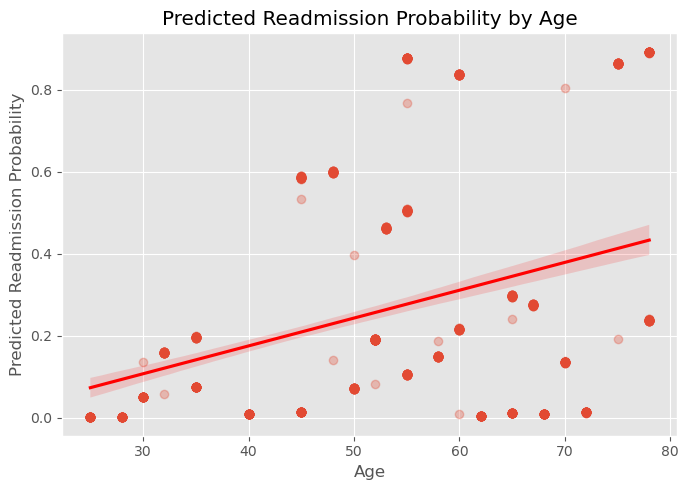

(0.34984520029982347, 1.0458076747531071e-29)

In [29]:
df_encoded = data.copy()

# Encode categorical variables
label_encoders = {}
for col in ['Gender', 'Condition', 'Procedure', 'Outcome', 'Readmission']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Fit logistic regression model
formula = 'Readmission ~ Age + Cost + Satisfaction + Length_of_Stay + Gender + Condition + Procedure + Outcome'
logit_model = logit(formula, data=df_encoded).fit()

# Predict readmission probabilities
df_encoded['Readmission_Prob'] = logit_model.predict(df_encoded)

# Scatter plot with regression line: Age vs Predicted Readmission Probability
plt.figure(figsize=(7, 5))
sns.regplot(x='Age', y='Readmission_Prob', data=df_encoded, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title("Predicted Readmission Probability by Age")
plt.xlabel("Age")
plt.ylabel("Predicted Readmission Probability")
plt.tight_layout()
plt.show()

# Calculate Pearson correlation between age and predicted probability of readmission
from scipy.stats import pearsonr
age_corr, age_pval = pearsonr(df_encoded['Age'], df_encoded['Readmission_Prob'])

age_corr, age_pval

There is a moderate positive correlation between age and predicted readmission probability, which means as patient age increases, the risk of readmission also increases.

The regression line in the plot visually confirms this upward trend.

<Figure size 700x500 with 0 Axes>

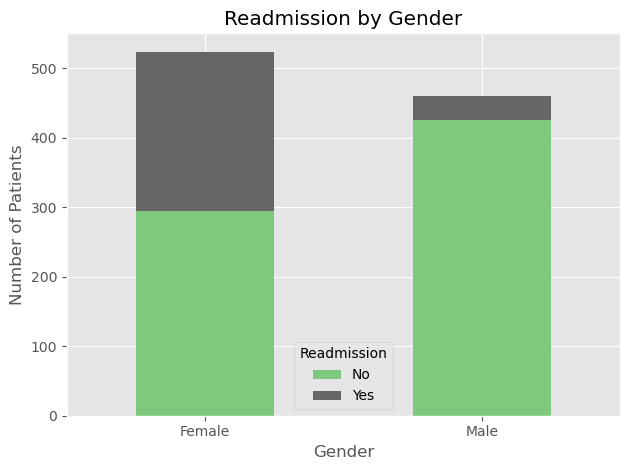

(164.40167765440668,
 1.2359860716564577e-37,
 Readmission   No  Yes
 Gender               
 Female       294  230
 Male         426   34)

In [30]:
#use contingency table because we're analysing two categorical variables (gender and readmission)
# it shows how frequently each combination of the two categories occur

from scipy.stats import chi2_contingency

# Create contingency table
gender_readmission_ct = pd.crosstab(data['Gender'], data['Readmission'])

# Perform Chi-square test
chi2_stat, chi2_p, chi2_dof, chi2_expected = chi2_contingency(gender_readmission_ct)

# Plot counts
plt.figure(figsize=(7, 5))
gender_readmission_ct.plot(kind='bar', stacked=True, colormap='Accent')
plt.ylabel("Number of Patients")
plt.title("Readmission by Gender")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

chi2_stat, chi2_p, gender_readmission_ct

Interpretation:

Female patients are much more likely to be readmitted than male patients. This difference is highly statistically significant. Nearly 44% of females are readmitted, compared to just 7% of males.

Optimization terminated successfully.
         Current function value: 0.355348
         Iterations 9


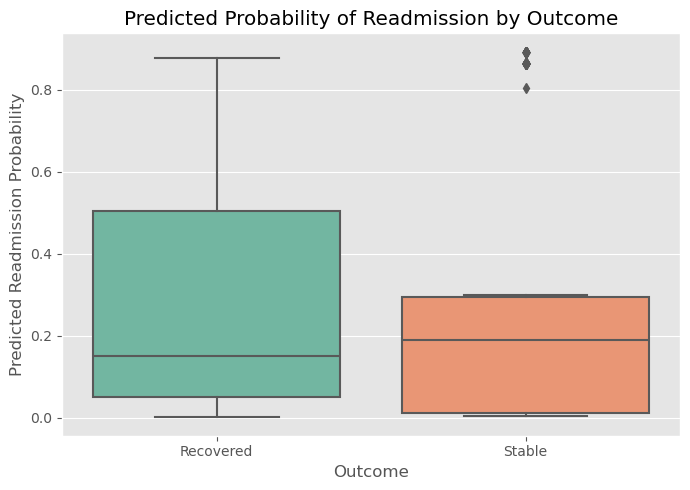

In [31]:
#analyse outcome vs readmission by visualising logistic regression model
# Copy the original dataframe and encode categorical variables
df_encoded = data.copy()
label_encoders = {}
for col in ['Gender', 'Condition', 'Procedure', 'Outcome', 'Readmission']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

#Fit logistic regression model
logit_formula = 'Readmission ~ Age + Cost + Satisfaction + Length_of_Stay + Gender + Condition + Procedure + Outcome'
logit_model = logit(logit_formula, data=df_encoded).fit()

#Predict readmission probabilities
df_encoded['Readmission_Prob'] = logit_model.predict(df_encoded)

#Map encoded outcome back to original labels
outcome_labels = label_encoders['Outcome'].inverse_transform(df_encoded['Outcome'])
df_encoded['Outcome_Label'] = outcome_labels

#Visualise predicted probability of readmission by outcome
plt.figure(figsize=(7, 5))
sns.boxplot(x='Outcome_Label', y='Readmission_Prob', data=df_encoded, palette="Set2")
plt.title("Predicted Probability of Readmission by Outcome")
plt.ylabel("Predicted Readmission Probability")
plt.xlabel("Outcome")
plt.tight_layout()
plt.show()

Interpretation:
Stable patients have noticeably higher predicted readmission risk than Recovered patients.

## Evaluations/ Findings

### Higher hospital costs are linked to better outcomes, but not always higher satisfaction

- Patients who were fully recovered incurred significantly higher hospital costs compared to those discharged as "stable."

- However, high cost does not always lead to higher satisfaction, especially for complex or invasive procedures.

### Age is a major driver of readmission, low patient satisfaction, and cost

- Older patients have a higher predicted probability of readmission and tend to incur higher care costs, possibly due to comorbidities or extended recovery periods.

- This age group may benefit from targeted interventions to reduce hospital burden.

### Gender differences exist in cost, satisfaction, and readmission

- Female patients reported higher satisfaction, but also incurred higher average hospital costs and showed increased readmission risk.

- These patterns suggest gender-specific care needs and expectations should be addressed.

### Certain procedures and conditions drive both cost and satisfaction

- Some procedures (e.g., X-Ray and Splint, Epinephrine Injection) had high satisfaction and low cost, while others (e.g., Cardiac Catheterization, CT + Medication) showed low satisfaction despite high cost.

- This disparity highlights opportunities to review and improve care delivery in specific departments.

## Recommendations

### Optimise care pathways for high-cost (complex) procedures by combining clinical effectiveness with patient satisfaction metrics.

Since higher hospital spending contributes to better outcomes but doesn't always yield higher satisfaction, hospitals should review workflows for expensive procedures to identify where operational costs can be reduced without compromising care quality—while also addressing communication gaps or patient discomfort that may be lowering satisfaction.



### Implement targeted care for older patients to prevent costly readmissions.

Older patients have higher readmission risk and treatment costs. Establishing an age-specific post-discharge support system (e.g., home check-ins, telehealth, medication review) can reduce resource use on the hospital while improving continuity of care and patient outcomes.

### Investigate and address care variations by gender to reduce hospital expenses and improve satisfaction.

Since female patients incur higher costs and readmissions but report higher satisfaction, the hospital should analyse whether there are operational factors (e.g., treatment protocols, length of stay) that are contributing to inefficiencies. Use this insight to design gender-sensitive service improvements that balance cost and care quality.

### Standardise and scale best practices from high-satisfaction, low-cost procedures.

Procedures like "X-ray and splint" deliver high satisfaction with low cost. The hospital should identify process efficiencies (e.g., streamlined care, patient communication, rapid recovery) and apply these lessons to more complex, lower-satisfaction services to improve outcomes and reduce cost variability.

## Future steps

- Perform cost-benefit analysis of recovered vs stable outcomes. Example: check 30-day readmission rates etc. to track long-term outcomes and costs, to see if recovered patients have better long-term outcomes. Recovery is more expensive upfront, but if long-term outcomes are better then the high-cost interventions may be cost-effective after all.

- Use machine learning to group patients by similar patterns in satisfaction, readmission risk, and hospital cost to enable targeted intervention strategies for specific patient groups

- Incorporate time-based dimensions (month of admission, day of discharge) to explore how satisfaction, cost, or readmission fluctuate over time